In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

#the dataset
data = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
print(data.shape)
data.head()

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Features of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
print('Categorical Features ')
print(data.select_dtypes(['object']).columns)
print('Numeric Features')
data.select_dtypes(['int64','float64']).columns

Categorical Features 
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
Numeric Features


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

**Categorical Feature** : Suburb. Address, Type, Method, SellerG, Date, CouncilArea, Region Name


**Numeric Features** : Rooms, Price, Distance, Postcode, Bedroom2, Bathroom, Car, Land Size, Building Area, YearBuild, Lattitude, Longtitude, Property count

## Cleaning Data

In [5]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Step for cleaning data
**+ Drop the Nan values of Distance, Postcode, Council Area, Region Name, Property Count because there are just a few missing value**
**+ Drop the NaN value from year build because can not replace with any value**

**+ Replace int64, and float64 variable with mean value**

**+ Replace object variables with the values that has highest count values**

**+ Drop the column Lattidu and Longtittude because if we replace with any values, it will conflict with Building Area or LandSize in my understanding**

**+ Drop the column Seller G, Property Count and Address since theese variables has no  value for my further analyis**

In [6]:
#drop columns
data.dropna(subset = ['Distance','Postcode','CouncilArea','Regionname','YearBuilt','Lattitude', 'Longtitude'], inplace = True)
data = data.drop(['Propertycount','SellerG','Address'], axis = 1)

In [7]:
#numerical variables
data['Price'].fillna((data['Price'].mean()), inplace = True)
data['Landsize'].fillna((data['Landsize'].mean()), inplace = True)
data['BuildingArea'].fillna((data['BuildingArea'].mean()), inplace = True)
#Catigorical variables
data['Bedroom2'].fillna((data['Bedroom2'].value_counts().index[0]), inplace = True)
data['Bathroom'].fillna((data['Bedroom2'].value_counts().index[0]), inplace = True)
data['Car'].fillna((data['Car'].value_counts().index[0]), inplace = True)

In [8]:
print(data.shape)
data.isnull().sum()

(15542, 18)


Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Date            0
Distance        0
Postcode        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Lattitude       0
Longtitude      0
Regionname      0
dtype: int64

## Featuring data

In [9]:
print('Categorical Features ')
print(data.select_dtypes(['object']).columns)
print('Numeric Features')
data.select_dtypes(['int64','float64']).columns

Categorical Features 
Index(['Suburb', 'Type', 'Method', 'Date', 'CouncilArea', 'Regionname'], dtype='object')
Numeric Features


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,15542.0,3.108352e+00,0.986478,1.00000,2.0000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15542.0,1.077469e+06,591866.464970,85000.00000,700000.0000,1.077469e+06,1.190000e+06,9.000000e+06
Distance,15542.0,1.115160e+01,6.944602,0.00000,6.3000,1.010000e+01,1.400000e+01,4.810000e+01
Postcode,15542.0,3.117065e+03,115.185764,3000.00000,3047.0000,3.101000e+03,3.155000e+03,3.978000e+03
Bedroom2,15542.0,3.090207e+00,1.008730,0.00000,2.0000,3.000000e+00,4.000000e+00,3.000000e+01
Bathroom,15542.0,1.670313e+00,0.735133,0.00000,1.0000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15542.0,1.708532e+00,0.993501,0.00000,1.0000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15542.0,5.315662e+02,989.417250,0.00000,231.0000,5.315662e+02,6.420000e+02,4.280000e+04
BuildingArea,15542.0,1.539193e+02,82.098538,0.00000,108.0000,1.500000e+02,1.750000e+02,3.112000e+03
YearBuilt,15542.0,1.965281e+03,37.316407,1196.00000,1940.0000,1.970000e+03,2.000000e+03,2.106000e+03


**Notice: The Rooms column and Bedroom2 have nearly the same gerneral statistic, let's perform t-test to examinate whether they are carrying the same information or not**

In [11]:
#t-test
from scipy.stats import ttest_ind
ttest_ind(data['Rooms'], data['Bedroom2'])

Ttest_indResult(statistic=1.6032290658305581, pvalue=0.10889425148587777)

**p-value** is 0.1526 which is much greater than 0.05, showing that the 2 dataset are the same since we can not reject the null hypotheis, lets drop 1 out of 2 columns

**notice** The min value in the Bedroom2 columns is 0,which is imposible, so I decided to drop the Bedroom2 columns

In [12]:
data.drop(['Bedroom2'], axis = 1)

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,2,h,1.035000e+06,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan
4,Abbotsford,3,h,1.465000e+06,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan
6,Abbotsford,4,h,1.600000e+06,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan
7,Abbotsford,4,h,1.077469e+06,SN,6/08/2016,2.5,3067.0,2.0,2.0,400.0,220.000000,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan
8,Abbotsford,2,h,1.077469e+06,S,6/08/2016,2.5,3067.0,1.0,2.0,201.0,153.919348,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,3,h,5.700000e+05,SP,24/02/2018,25.5,3750.0,2.0,2.0,404.0,158.000000,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan
34850,Wollert,3,h,1.077469e+06,SP,24/02/2018,25.5,3750.0,2.0,2.0,268.0,135.000000,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan
34853,Yarraville,2,h,8.880000e+05,SP,24/02/2018,6.3,3013.0,2.0,1.0,98.0,104.000000,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan
34854,Yarraville,2,t,7.050000e+05,S,24/02/2018,6.3,3013.0,1.0,2.0,220.0,120.000000,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan


## Adjusting Features

**Notice** The Room column and Bedroom2 have nearly the same gerneral statistic, let's perform t-test to examinate whether they are carrying the same information or not

In [13]:
#t-test
from scipy.stats import ttest_ind
ttest_ind(data['Rooms'], data['Bedroom2'])

Ttest_indResult(statistic=1.6032290658305581, pvalue=0.10889425148587777)

**p-value** is 0.1526 which is much greater than 0.05, showing that the 2 dataset are the same since we can not reject the null hypotheis, lets drop 1 out of 2 columns

**notice** The min value in the Bedroom2 columns is 0, so I decided to drop the Bedroom2 columns

In [14]:
data = data.drop(['Bedroom2'], axis=1)

## Data Visualization

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation of features')

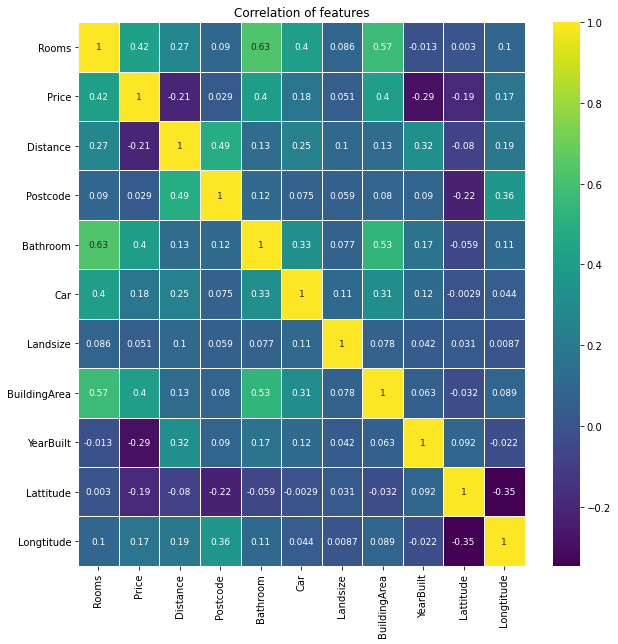

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap = 'viridis', linewidth =1, annot=True, annot_kws = {'size':9})
plt.title('Correlation of features')

**Price Distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

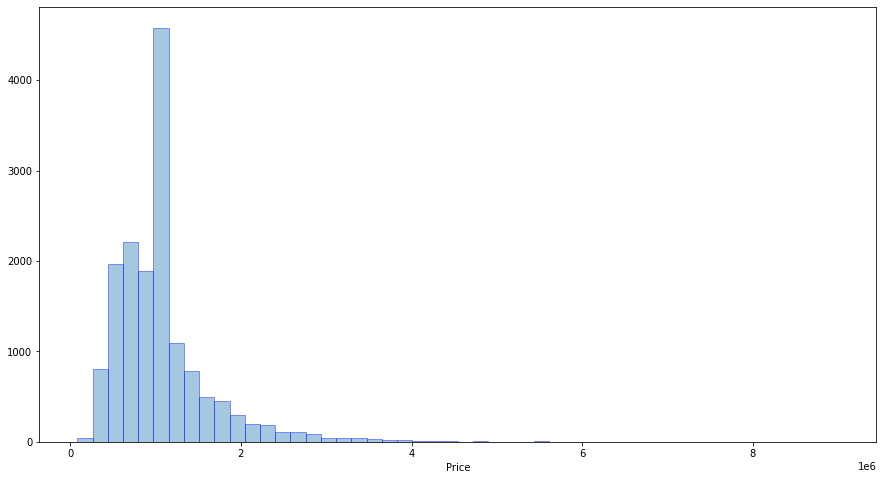

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(data['Price'], kde = False,hist_kws=dict(edgecolor="b"))

**Ploting categorical Features with Price**

Text(0.5, 1.0, 'Method vs Price')

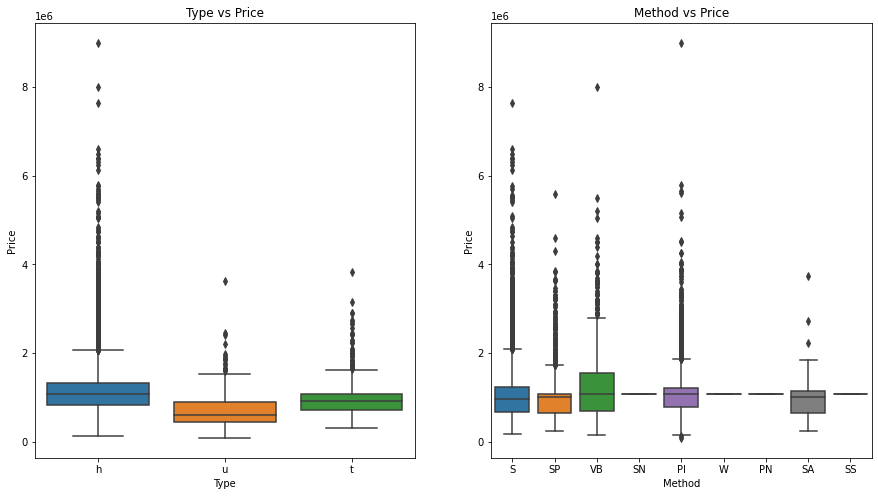

In [17]:
plt.figure(figsize =(15,8))

ax1 = plt.subplot(1,2,1)
sns.boxplot(data=data, x='Type', y='Price')
ax1.set_xlabel('Type')
ax1.set_ylabel('Price')
ax1.set_title('Type vs Price')

ax2 = plt.subplot(1,2,2,sharey=ax1)
sns.boxplot(data=data, x='Method', y='Price')
ax2.set_xlabel('Method')
ax2.set_ylabel('Price')
ax2.set_title('Method vs Price')




**Plotting numeric variables**

Base on the Correlation Heatmap, the  mumeric variables that has significant correlation to Price is : Rooms, Bathroom, Cars, BuildingArea, Longittude

Text(0.5, 1.0, 'Longtitude vs Price')

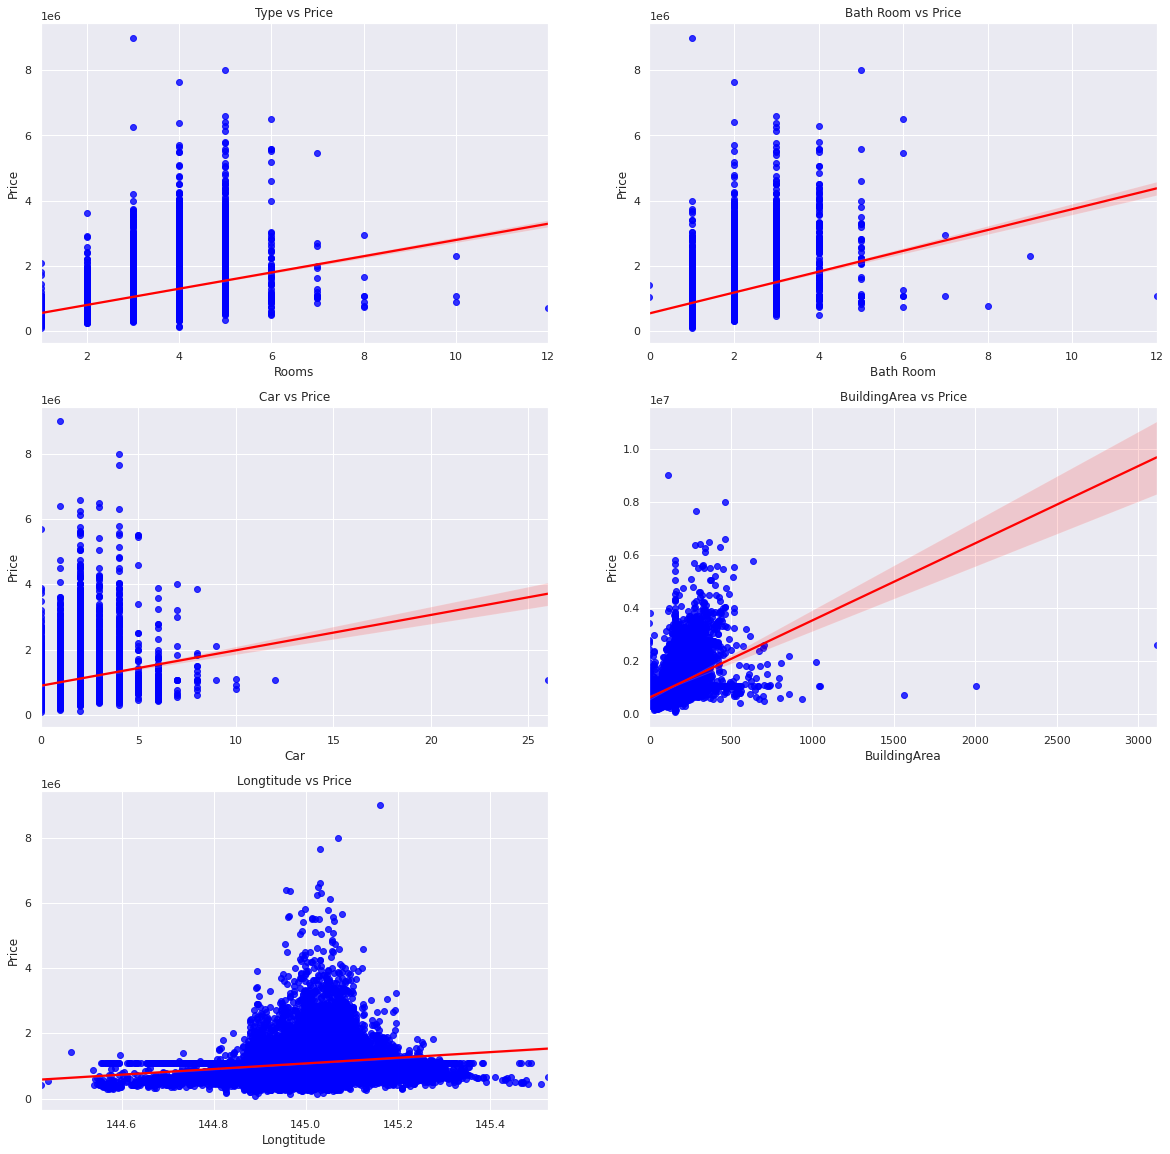

In [18]:
sns.set_style('darkgrid')
sns.set(font_scale =1)

plt.figure(figsize=(20,20))

ax1 =plt.subplot(3,2,1)
sns.regplot(data=data, x='Rooms', y='Price',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax1.set_xlabel('Rooms')
ax1.set_ylabel('Price')
ax1.set_title('Type vs Price')

ax2 = plt.subplot(3,2,2)
sns.regplot(data=data, x='Bathroom', y='Price',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax2.set_xlabel('Bath Room')
ax2.set_ylabel('Price')
ax2.set_title('Bath Room vs Price')

ax3 = plt.subplot(3,2,3)
sns.regplot(data=data, x='Car', y='Price',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set_xlabel('Car')
ax3.set_ylabel('Price')
ax3.set_title('Car vs Price')

ax4 = plt.subplot(3,2,4)
sns.regplot(data=data, x='BuildingArea', y='Price',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax4.set_xlabel('BuildingArea')
ax4.set_ylabel('Price')
ax4.set_title('BuildingArea vs Price')

ax5 = plt.subplot(3,2,5)
sns.regplot(data=data, x='Longtitude', y='Price',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax5.set_xlabel('Longtitude')
ax5.set_ylabel('Price')
ax5.set_title('Longtitude vs Price')

## Outliers

<AxesSubplot:ylabel='Price'>

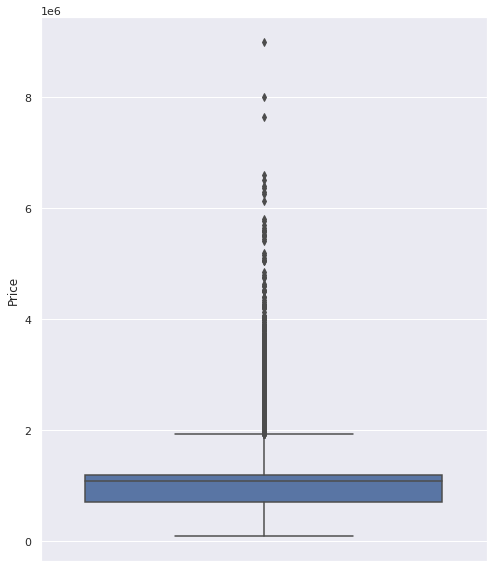

In [19]:
plt.figure(figsize=(8,10))
sns.boxplot(data = data, y='Price')

As can be seen from the Price boxplot, the maximum value for the price is 2.5M dollar, and there are a lot of outliers

In [20]:
outliers = data[data['Price']>2500000]
outliers.describe().T


,count,mean,std,min,25%,50%,75%,max
Rooms,488.0,4.237705e+00,0.795813,2.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00
Price,488.0,3.268546e+06,869448.315223,2.504000e+06,2.700000e+06,2.995000e+06,3.502500e+06,9.000000e+06
Distance,488.0,7.804918e+00,3.260745,1.500000e+00,5.400000e+00,7.800000e+00,1.020000e+01,2.110000e+01
Postcode,488.0,3.134783e+03,43.531267,3.002000e+03,3.103000e+03,3.127000e+03,3.182000e+03,3.207000e+03
Bathroom,488.0,2.706967e+00,0.925452,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
Car,488.0,2.278689e+00,1.132041,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
Landsize,488.0,7.372722e+02,462.043735,0.000000e+00,5.315662e+02,6.675000e+02,8.337500e+02,5.022000e+03
BuildingArea,488.0,2.752349e+02,165.969580,0.000000e+00,1.825000e+02,2.650000e+02,3.342500e+02,3.112000e+03
YearBuilt,488.0,1.946607e+03,45.790714,1.854000e+03,1.910000e+03,1.932000e+03,1.998000e+03,2.017000e+03
Lattitude,488.0,-3.784255e+01,0.045750,-3.798740e+01,-3.786540e+01,-3.783886e+01,-3.781150e+01,-3.773896e+01


In [21]:
maxfence_price = data[data['Price']==2500000]
maxfence_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,18.0,4.000000e+00,0.907485,3.000000e+00,3.000000e+00,4.000000e+00,4.750000e+00,6.000000e+00
Price,18.0,2.500000e+06,0.000000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
Distance,18.0,8.216667e+00,3.231144,2.700000e+00,6.125000e+00,8.050000e+00,1.030000e+01,1.380000e+01
Postcode,18.0,3.139556e+03,54.584228,3.016000e+03,3.124750e+03,3.144500e+03,3.187000e+03,3.206000e+03
Bathroom,18.0,2.277778e+00,0.669113,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
Car,18.0,2.611111e+00,1.092159,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Landsize,18.0,6.851426e+02,277.471096,1.650000e+02,5.374247e+02,6.670000e+02,8.452500e+02,1.212000e+03
BuildingArea,18.0,2.078477e+02,63.118462,1.100000e+02,1.539193e+02,2.025000e+02,2.520000e+02,3.290000e+02
YearBuilt,18.0,1.940222e+03,40.568831,1.880000e+03,1.920000e+03,1.927500e+03,1.966500e+03,2.008000e+03
Lattitude,18.0,-3.785755e+01,0.053320,-3.794360e+01,-3.790426e+01,-3.785469e+01,-3.782395e+01,-3.774570e+01


**Notice** the outliers whose price are greater than 2.5M have no siginificant difference compare to value at max fence value

As can be seen, an averge house at 2.5M dollar has the mean rooms of 4, bathroom of 2.27, Building Area of 2.07

Mean while a higher price house, which is above 2.5M dollar has mean room of 4.2, bath rooms of 2.7, Building Area of 2.75

Which a range price from 2.5M dollar to 8M dollar but there are no significant different features, so mainly from my own experience, the price is evaluated base on the location, which i can not examicated in this project. Thus, these outliers should be removed since they has no relevant

In [22]:
#Remove item that has price that greater than 2.5M
data = data[data['Price']<=2500000]
print(data.shape)
data.describe().T

(15054, 17)


,count,mean,std,min,25%,50%,75%,max
Rooms,15054.0,3.071742e+00,0.970313,1.00000,2.000000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15054.0,1.006442e+06,420147.688626,85000.00000,691000.000000,1.065000e+06,1.115000e+06,2.500000e+06
Distance,15054.0,1.126009e+01,7.005150,0.00000,6.300000,1.020000e+01,1.400000e+01,4.810000e+01
Postcode,15054.0,3.116490e+03,116.730762,3000.00000,3046.000000,3.101000e+03,3.153000e+03,3.978000e+03
Bathroom,15054.0,1.636708e+00,0.703039,0.00000,1.000000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15054.0,1.690049e+00,0.983210,0.00000,1.000000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15054.0,5.248980e+02,1001.179185,0.00000,226.000000,5.315662e+02,6.310000e+02,4.280000e+04
BuildingArea,15054.0,1.499867e+02,74.665349,0.00000,107.000000,1.470000e+02,1.700000e+02,2.002000e+03
YearBuilt,15054.0,1.965886e+03,36.853088,1196.00000,1947.000000,1.970000e+03,2.000000e+03,2.106000e+03
Lattitude,15054.0,-3.780839e+01,0.091069,-38.19043,-37.861175,-3.780540e+01,-3.775285e+01,-3.739020e+01


## One hot encoding dummies variables

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15054 entries, 2 to 34856
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        15054 non-null  object 
 1   Rooms         15054 non-null  int64  
 2   Type          15054 non-null  object 
 3   Price         15054 non-null  float64
 4   Method        15054 non-null  object 
 5   Date          15054 non-null  object 
 6   Distance      15054 non-null  float64
 7   Postcode      15054 non-null  float64
 8   Bathroom      15054 non-null  float64
 9   Car           15054 non-null  float64
 10  Landsize      15054 non-null  float64
 11  BuildingArea  15054 non-null  float64
 12  YearBuilt     15054 non-null  float64
 13  CouncilArea   15054 non-null  object 
 14  Lattitude     15054 non-null  float64
 15  Longtitude    15054 non-null  float64
 16  Regionname    15054 non-null  object 
dtypes: float64(10), int64(1), object(6)
memory usage: 2.1+ MB


## Linear Regression

**Drop some variables that are considered to has no value to my further analysis**

In [24]:
##create new dataset

new_data = data.copy()
new_data.drop(['Date','Suburb','Postcode','YearBuilt'],axis = 1, inplace = True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15054 entries, 2 to 34856
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         15054 non-null  int64  
 1   Type          15054 non-null  object 
 2   Price         15054 non-null  float64
 3   Method        15054 non-null  object 
 4   Distance      15054 non-null  float64
 5   Bathroom      15054 non-null  float64
 6   Car           15054 non-null  float64
 7   Landsize      15054 non-null  float64
 8   BuildingArea  15054 non-null  float64
 9   CouncilArea   15054 non-null  object 
 10  Lattitude     15054 non-null  float64
 11  Longtitude    15054 non-null  float64
 12  Regionname    15054 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.6+ MB


**Split data**

In [25]:
one_hot_encode_cols = new_data.dtypes[new_data.dtypes ==np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

print(new_data[one_hot_encode_cols].shape)
new_data[one_hot_encode_cols].head()

(15054, 4)


,Type,Method,CouncilArea,Regionname
2,h,S,Yarra City Council,Northern Metropolitan
4,h,SP,Yarra City Council,Northern Metropolitan
6,h,VB,Yarra City Council,Northern Metropolitan
7,h,SN,Yarra City Council,Northern Metropolitan
8,h,S,Yarra City Council,Northern Metropolitan


In [26]:
new_data = pd.get_dummies(new_data, columns = one_hot_encode_cols, drop_first = True)
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,15054.0,3.071742e+00,0.970313,1.00000,2.000000,3.000000e+00,4.000000e+00,1.200000e+01
Price,15054.0,1.006442e+06,420147.688626,85000.00000,691000.000000,1.065000e+06,1.115000e+06,2.500000e+06
Distance,15054.0,1.126009e+01,7.005150,0.00000,6.300000,1.020000e+01,1.400000e+01,4.810000e+01
Bathroom,15054.0,1.636708e+00,0.703039,0.00000,1.000000,2.000000e+00,2.000000e+00,1.200000e+01
Car,15054.0,1.690049e+00,0.983210,0.00000,1.000000,2.000000e+00,2.000000e+00,2.600000e+01
Landsize,15054.0,5.248980e+02,1001.179185,0.00000,226.000000,5.315662e+02,6.310000e+02,4.280000e+04
BuildingArea,15054.0,1.499867e+02,74.665349,0.00000,107.000000,1.470000e+02,1.700000e+02,2.002000e+03
Lattitude,15054.0,-3.780839e+01,0.091069,-38.19043,-37.861175,-3.780540e+01,-3.775285e+01,-3.739020e+01
Longtitude,15054.0,1.449980e+02,0.121250,144.42379,144.928400,1.450032e+02,1.450688e+02,1.455264e+02
Type_t,15054.0,8.396439e-02,0.277344,0.00000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00


## Model Selection

In [27]:
#import regression libraries
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict


In [28]:
X = new_data.drop('Price', axis=1)
y = new_data.Price
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Type_t,Type_u,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,1.0,0.0,156.0,79.000000,-37.8079,144.9934,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,2.0,0.0,134.0,150.000000,-37.8093,144.9944,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,1.0,2.0,120.0,142.000000,-37.8072,144.9941,0,0,...,0,1,0,0,1,0,0,0,0,0
7,4,2.5,2.0,2.0,400.0,220.000000,-37.7965,144.9965,0,0,...,0,1,0,0,1,0,0,0,0,0
8,2,2.5,1.0,2.0,201.0,153.919348,-37.7995,144.9974,0,0,...,0,1,0,0,1,0,0,0,0,0


In [29]:
kf= KFold(shuffle=True, random_state=72018, n_splits=3)

for train_index, test_index in kf.split(X):
    print('Train index', train_index[:10],len(train_index))
    print('Test Index',test_index[:10], len(test_index))
    print('')

Train index [ 0  2  4  5  8 10 11 12 13 15] 10036
Test Index [ 1  3  6  7  9 14 16 18 22 27] 5018

Train index [ 0  1  2  3  4  6  7  8  9 10] 10036
Test Index [ 5 11 13 15 17 21 24 25 26 34] 5018

Train index [ 1  3  5  6  7  9 11 13 14 15] 10036
Test Index [ 0  2  4  8 10 12 19 20 23 28] 5018



**Fitting Linear Regression with K-fold Cross Validation**

In [30]:
scores=[]

lr=LinearRegression()
s= StandardScaler()

for train_index, test_index in kf.split(X):
    X_train,X_test, y_train,y_test = (X.iloc[train_index,:],
                                      X.iloc[test_index,:],
                                      y.iloc[train_index],
                                      y.iloc[test_index])
    #print(X_train.shape)
    #print(y_train.shape)
    X_train_s=s.fit_transform(X_train)
    
    lr.fit(X_train,y_train)
    
    X_test_s=s.fit_transform(X_test)
    
    y_pred = lr.predict(X_test)
    
    score = r2_score(y_test.values,y_pred)
    
    scores.append(score)
    
scores
    

[0.5180370828271249, 0.5046688824093211, 0.5158275164086965]

In [31]:
np.mean(scores)

0.5128444938817142

## Ridge Regression with GridSearch

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

hparams = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(4, 20, 20)
}

grid = GridSearchCV(estimator, hparams, cv=kf)

In [33]:
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)

0.5129514253400561
{'polynomial_features__degree': 1, 'ridge_regression__alpha': 20.000000000000004}


In [34]:
y_predict = grid.predict(X)
r2_score(y, y_predict)

0.5166181498320155

**I convert the code below to markdown since Kaggle does not have enough space(20gb) to perform Gridsearch,r2_score is around 0.518**

## Lasso Regression 


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

hparams = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.6, 6, 30)
}

grid = GridSearchCV(estimator, hparams, cv=kf)

grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)

y_predict = grid.predict(X)
r2_score(y, y_predict)

## ElasticNet Regression

In [35]:
from sklearn.linear_model import ElasticNetCV
alphas2 = np.array([0.005,0.05,0.1,1,5,20,50,80,100,120,140])
l1_ratios = np.linspace(0.1,0.9,9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
r2_score=r2_score(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, r2_score)

0.005 0.9 0.5153984178784298
